2023-03-21 14:11:21.061 Python[34311:5328668] +[CATransaction synchronize] called within transaction
2023-03-21 14:11:24.409 Python[34311:5328668] +[CATransaction synchronize] called within transaction


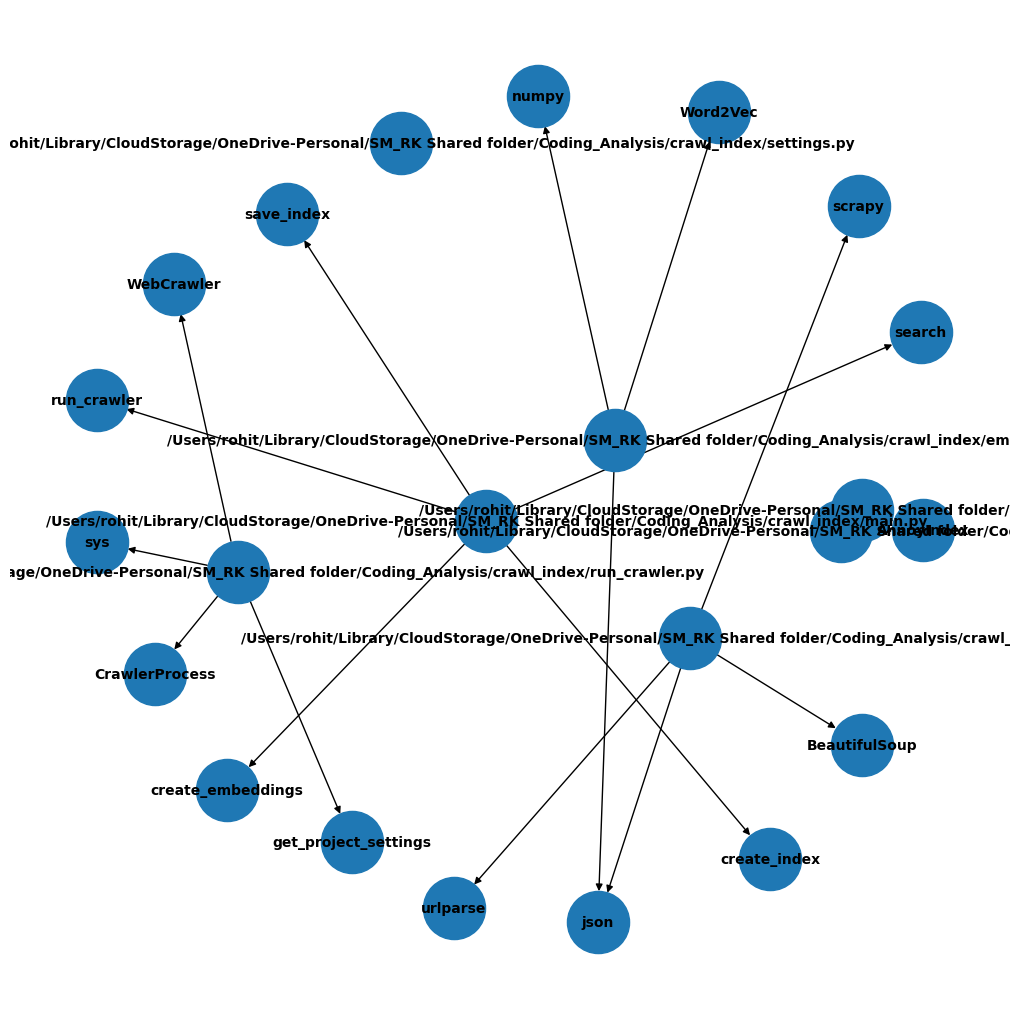

User: You are an exceptional programmer, like Linus Torvalds. You can understand entire codebases and the interrelationships. Please generate a perfectly detailed summary of the code, its structure and possible uses given the following filenames and functions:
File: /Users/rohit/Library/CloudStorage/OneDrive-Personal/SM_RK Shared folder/Coding_Analysis/crawl_index/embed.py

Imports:
  - json
  - Word2Vec
  - numpy


Functions:
  - load_data
  - embed_text
  - create_embeddings


Variables:
  - model
  - data
  - words
  - embedded_data
  - embeddings


File: /Users/rohit/Library/CloudStorage/OneDrive-Personal/SM_RK Shared folder/Coding_Analysis/crawl_index/query.py

Imports:
  - AnnoyIndex


Functions:
  - search


Variables:
  - query
  - results
  - index
  - nearest_ids
  - query_embedding


File: /Users/rohit/Library/CloudStorage/OneDrive-Personal/SM_RK Shared folder/Coding_Analysis/crawl_index/index.py

Imports:
  - AnnoyIndex


Functions:
  - create_index
  - save_index


Variabl

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import ast
import pprint
from collections import defaultdict
import tkinter as tk
from tkinter import filedialog
import logging
import warnings
import ast
import openai
import callgpt
from callgpt import Chatbot

logger = logging.getLogger(__name__)

# Catch warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

def open_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as infile:
        return infile.read()

directory = filedialog.askdirectory()
os.chdir(directory)
warnings.filterwarnings("ignore")

def clone_github_repo(repo_url):
    temp_dir = tempfile.mkdtemp()
    Repo.clone_from(repo_url, temp_dir)
    return temp_dir

def find_python_files(path):
    python_files = []
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(".py"):
                python_files.append(os.path.join(root, file))
    return python_files

def analyze_directory(directory):
    python_files = find_python_files(directory)
    file_analysis = {}

    for file_path in python_files:
        file_info = extract_info_from_file(file_path)
        file_analysis[file_path] = file_info

    return file_analysis

def extract_info_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        file_content = f.read()

    tree = ast.parse(file_content)
    file_info = {
        "functions": [],
        "imports": [],
        "variables": set(),
    }

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            file_info["functions"].append(node.name)
        elif isinstance(node, ast.Import) or isinstance(node, ast.ImportFrom):
            for alias in node.names:
                file_info["imports"].append(alias.name)
        elif isinstance(node, ast.Assign):
            for target in node.targets:
                if isinstance(target, ast.Name):
                    file_info["variables"].add(target.id)

    file_info["variables"] = list(file_info["variables"])
    return file_info

def visualize_connections(analysis):
    G = nx.DiGraph()

    for file_path, info in analysis.items():
        G.add_node(file_path)

        for imported_module in info["imports"]:
            G.add_node(imported_module)
            G.add_edge(file_path, imported_module)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight="bold")
    plt.show()

def generate_textual_summary(analysis):
    summary = []

    for file_path, info in analysis.items():
        summary.append(f"File: {file_path}\n")

        if info["imports"]:
            summary.append("Imports:")
            for imported_module in info["imports"]:
                summary.append(f"  - {imported_module}")
            summary.append("\n")

        if info["functions"]:
            summary.append("Functions:")
            for function_name in info["functions"]:
                summary.append(f"  - {function_name}")
            summary.append("\n")

        if info["variables"]:
            summary.append("Variables:")
            for variable_name in info["variables"]:
                summary.append(f"  - {variable_name}")
            summary.append("\n")

    return "\n".join(summary)

def main():
    # repo_url = input("Input url") # Replace with the GitHub repository URL
    # local_repo_path = clone_github_repo(repo_url)
    analysis = analyze_directory(directory)
    # pprint.pprint(analysis)
    visualize_connections(analysis)
    summary = generate_textual_summary(analysis)
    prompt = "You are an exceptional programmer, like Linus Torvalds. You can understand entire codebases and the interrelationships. Please generate a perfectly detailed summary of the code, its structure and possible uses given the following filenames and functions:\n"+str(summary)+"\n\n:"
    chatbot = Chatbot()
    response = chatbot.smart_prompt(prompt)
    print(response)

    # Loop to handle follow-up questions
    while True:
        user_question = input("\nEnter your follow-up question or type 'exit' to quit: ").strip()
        if user_question.lower() == 'exit':
            break

        # Call GPT chatbot with the follow-up question
        response = chatbot.smart_prompt(user_question)
        # print(response)

if __name__ == "__main__":
    main()
